# Two variants of gradient descent

In [1]:
import os
import pandas as pd
import numpy as np
import gd    #import the class set before in the same directory 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Define the functions we will use

In [2]:
def fn_loss(x1,x2):
    return 2*x1**2 - 1.05*x1**4 + (x1**6)/6 +x1*x2 + x2**2

In [3]:
def fn_grad1(x1,x2):
    return 4*x1 - 4*(1.05)*x1**3 + x1**5 + x2

def fn_grad2(x1,x2):
    return x1 + 2*x2

# Momentum

In [4]:
import time 

In [5]:
solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1,fn_grad2 = fn_grad2)

In [6]:
start = time.time()
solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.5)
end = time.time()
print('running time: ',end - start)

Converged in 73 steps.  Loss fn 7.044576179967308e-07 achieved by x1 = 0.00041965987733038956 ,x2 = 0.00041965987733038956
running time:  0.004399776458740234


#### Compare momentum with vanilla gd when eta and n_iter are the same but momentum has alpha =0.5

In [7]:
#save the path above for momentum
v1=solver.x1_path
v2=solver.x2_path
vv= fn_loss(v1,v2)

In [8]:
start = time.time()
solver.vanilla_gd(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5)
end = time.time()
print('running time: ',end - start)

Converged in 164 steps.  Loss fn 7.271337863214712e-07 achieved by x1 = 0.0004263607102615566 ,x2 = 0.0004263607102615566
running time:  0.0020399093627929688


In [9]:
#save the path above for vanilla_gd
x1=solver.x1_path
x2=solver.x2_path
yy= fn_loss(x1,x2)

Text(0.5, 0, 'loss fn path ')

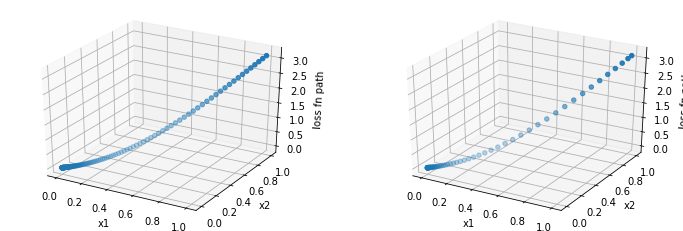

In [10]:
fig=plt.figure(figsize=(12,4))
#plot vanilla_gd
ax1 = fig.add_subplot(121,projection='3d')
ax1.scatter(x1, x2, yy)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('loss fn path ')
#plot momentum
ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(v1, v2, vv)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('loss fn path ')

Compare momentum with vanilla gd when eta and n_iter are the same but momentum has alpha =0.5

Result:

momentum time is 0.003946542739868164

vanilla gd is 0.005552768707275391

momentum is faster than vanilla gd

Also, from scatter plot, momentum reaches the global minimum with less steps

#### Running a loop to see different paths and time

In [11]:
for i in [0.001,0.005,0.01,0.05,0.1,0.5,0.8]:
    start = time.time()
    solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = i, tol = 1e-5,alpha =0.5)
    end = time.time()
    print('running time:',end - start)

Converged in 824 steps.  Loss fn 7.842428092737551e-07 achieved by x1 = 0.00044278743479110464 ,x2 = 0.00044278743479110464
running time: 0.007212400436401367
Converged in 157 steps.  Loss fn 7.737985076805738e-07 achieved by x1 = 0.00043982909947344113 ,x2 = 0.00043982909947344113
running time: 0.0015616416931152344
Converged in 73 steps.  Loss fn 7.044576179967308e-07 achieved by x1 = 0.00041965987733038956 ,x2 = 0.00041965987733038956
running time: 0.0008780956268310547
Converged in 20 steps.  Loss fn 4.74182916713979e-07 achieved by x1 = -0.0003443047093308934 ,x2 = -0.0003443047093308934
running time: 0.00039196014404296875
Converged in 20 steps.  Loss fn 4.777783056265383e-07 achieved by x1 = -0.0003456075522203241 ,x2 = -0.0003456075522203241
running time: 0.0003428459167480469
Converged in 11 steps.  Loss fn 8.907655757500328e-08 achieved by x1 = -0.00014922848094089947 ,x2 = -0.00014922848094089947
running time: 0.000244140625
Did not converge
running time: 0.08507966995239258

With increasing eta, time and steps needed to converge will decrease.

However, if eta is too large, it will diverge and does not reach global minimum.

# Nesterov’s Accelerated Gradient

First do Nesterov’s Accelerated Gradient

In [12]:
solver = gd.gd_pv_2d(fn_loss = fn_loss, fn_grad1 = fn_grad1,fn_grad2 = fn_grad2)

In [13]:
solver.nag(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.5)

Converged in 156 steps.  Loss fn 3.313415213533334e-06 achieved by x1 = -0.0007811579107035366 ,x2 = 0.0018890956092327423


In [14]:
start = time.time()
solver.nag(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.5)
end = time.time()
print('running time: ',end - start)

Converged in 156 steps.  Loss fn 3.313415213533334e-06 achieved by x1 = -0.0007811579107035366 ,x2 = 0.0018890956092327423
running time:  0.002015352249145508


#### Compare gradient descent with moment (with same inputs, alpha=0.6 and eta = 0.01)


In [23]:
solver.nag(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.2, tol = 1e-5,alpha =0.5)

Converged in 7 steps.  Loss fn 9.766820376137923e-05 achieved by x1 = 0.004959771862911444 ,x2 = -0.009870420385162068


In [24]:
#save the path above for nag
v1=solver.x1_path
v2=solver.x2_path
vv= fn_loss(v1,v2)

In [25]:
solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.2, tol = 1e-5,alpha =0.5)

Converged in 20 steps.  Loss fn 5.744471762808484e-07 achieved by x1 = -0.0003789614749339352 ,x2 = -0.0003789614749339352


In [26]:
#save the path above for momentum
x1=solver.x1_path
x2=solver.x2_path
yy= fn_loss(x1,x2)

Text(0.5, 0, 'loss fn path ')

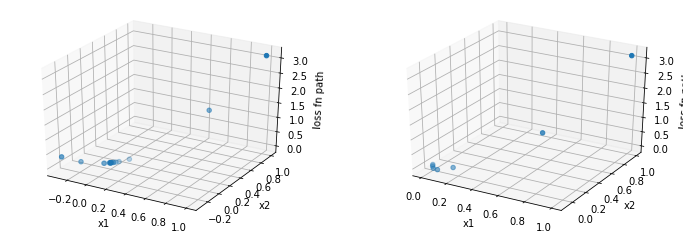

In [27]:
fig=plt.figure(figsize=(12,4))

#plot momentum
ax1 = fig.add_subplot(121,projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('loss fn path ')
ax1.scatter(x1, x2, yy)
#plot nag
ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(v1, v2, vv)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('loss fn path ')

momentum time is 0.004802703857421875

nag time is 0.006251335144042969

momentum is faster than nag

#### Change eta

In [151]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    print('eta:{0}'.format(i))
    start = time.time()
    solver.nag(x1_init = 1,x2_init = 1, n_iter = 10000, eta = i, tol = 1e-5,alpha =0.5)
    end = time.time()
    print('running time: {0}'.format(end-start))
    

eta:0.001
Converged in 1613 steps.  Loss fn 3.1710420281649675e-06 achieved by x1 = -0.0007641373329287152 ,x2 = 0.0018480861032301441
running time: 0.04336690902709961
eta:0.005
Converged in 318 steps.  Loss fn 3.254436295723127e-06 achieved by x1 = -0.0007741384607191377 ,x2 = 0.001872221932673855
running time: 0.008028268814086914
eta:0.01
Converged in 156 steps.  Loss fn 3.313415213533334e-06 achieved by x1 = -0.0007811579107035366 ,x2 = 0.0018890956092327423
running time: 0.005319833755493164
eta:0.05
Converged in 23 steps.  Loss fn 4.066875057276614e-06 achieved by x1 = -0.000875680732602149 ,x2 = 0.0020885815241287464
running time: 0.0010495185852050781
eta:0.1
Converged in 13 steps.  Loss fn 8.182153137517623e-06 achieved by x1 = 0.0012210457329906849 ,x2 = -0.002971240612861506
running time: 0.0007722377777099609


Running a loop to see different paths and time

With increasing eta, time and steps needed to converge will decrease.

However, if eta is too large, for example eta = 0.5, it will show error

#### change alpha:

In [188]:
solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.1)

Converged in 146 steps.  Loss fn 7.770593554134618e-07 achieved by x1 = 0.000440754862434674 ,x2 = 0.000440754862434674


In [189]:
v1=solver.x1_path
v2=solver.x2_path
vv= fn_loss(v1,v2)

In [190]:
solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.5)

Converged in 73 steps.  Loss fn 7.044576179967308e-07 achieved by x1 = 0.00041965987733038956 ,x2 = 0.00041965987733038956


In [191]:
y1=solver.x1_path
y2=solver.x2_path
yy= fn_loss(y1,y2)

In [192]:
solver.momentum(x1_init = 1,x2_init = 1, n_iter = 10000, eta = 0.01, tol = 1e-5,alpha =0.8)

Converged in 45 steps.  Loss fn 2.6233713210585374e-07 achieved by x1 = -0.00025609428762772947 ,x2 = -0.00025609428762772947


In [193]:
z1=solver.x1_path
z2=solver.x2_path
zz= fn_loss(z1,z2)

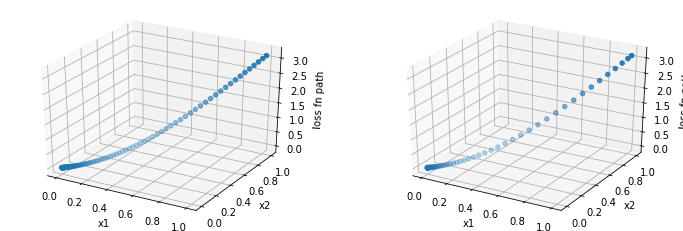

In [201]:
fig=plt.figure(figsize=(12,4))

#plot momentum
ax1 = fig.add_subplot(121,projection='3d')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('loss fn path ')
ax1.scatter(v1, v2, vv)
#plot nag
ax2 = fig.add_subplot(122,projection='3d')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('loss fn path ')
ax2.scatter(y1, y2, yy)
